In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("car_price.csv")

In [4]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [6]:
features=df.columns

In [7]:
features

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')

In [8]:
for feature in features:
  print(f"{feature}: {df[feature].isnull().sum()} missing values")

name: 0 missing values
company: 0 missing values
year: 0 missing values
Price: 0 missing values
kms_driven: 52 missing values
fuel_type: 55 missing values


In [9]:
df['kms_driven'].value_counts(dropna=False)

,count
kms_driven,
NaN,52
"35,000 kms",30
"45,000 kms",30
"55,000 kms",25
"50,000 kms",23
...,...
"33,400 kms",1
"1,625 kms",1
"2,450 kms",1


In [10]:
# Here in kms_driven an unusual instance petrol is present.
df['kms_driven']=np.where(df['kms_driven']=='Petrol',np.nan,df['kms_driven'])

In [11]:
df['kms_driven'] = df['kms_driven'].str.replace(' kms', '', regex=False)
df['kms_driven'] = df['kms_driven'].str.replace(',', '')
df['kms_driven'] = pd.to_numeric(df['kms_driven'], errors='coerce')
df['kms_driven'].fillna( df['kms_driven'].median(), inplace=True)

In [12]:
mode_fuel=df['fuel_type'].mode()[0]
df['fuel_type'].fillna(mode_fuel, inplace=True)

In [13]:
for feature in features:
  print(f"{feature}: {df[feature].isnull().sum()} missing values")

name: 0 missing values
company: 0 missing values
year: 0 missing values
Price: 0 missing values
kms_driven: 0 missing values
fuel_type: 0 missing values


In [14]:
df.head(5)


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40.0,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000.0,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",36000.0,Diesel


In [15]:
df['Price'].unique

<bound method Series.unique of 0             80,000
1           4,25,000
2      Ask For Price
3           3,25,000
4           5,75,000
           ...      
887         3,10,000
888         2,60,000
889         3,90,000
890         1,80,000
891         1,60,000
Name: Price, Length: 892, dtype: object>

In [16]:
# As price is my target variable and it has some values like 'Ask For Price' so first we check how many
# instances are there and then according value we will decide what to do with these.
(df['Price']=="Ask For Price").sum()

np.int64(35)

In [17]:
df=df[df['Price']!='Ask For Price']

In [18]:
df['Price'] = df['Price'].str.replace(',', '').astype(int)


In [19]:
df.head(5)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000.0,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40.0,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000.0,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000.0,Diesel
6,Ford Figo,Ford,2012,175000,41000.0,Diesel


In [20]:
df.dtypes

,0
name,object
company,object
year,object
Price,int64
kms_driven,float64
fuel_type,object


In [21]:
df['year'].unique()

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '150k', 'TOUR', '2003', 'r 15', '2004', 'sale', '1995', 'ara)',
       '2002', 'SELL', '2001', 'tion', 'odel', '2 bs', 'arry', 'o...',
       'Zest', 'ture', 'emi', 'car', 'able', 'd...', 'SALE', 'sell',
       'd Ex', 'n...', 'e...', 'go .', 'k...', 'o c4', 'zire', 'Sumo',
       'cab', 'EV2', 'r...', 'zest'], dtype=object)

In [22]:
df=df[df['year'].str.isnumeric()]

In [23]:
df['year']=df['year'].astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 819 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        819 non-null    object 
 1   company     819 non-null    object 
 2   year        819 non-null    int64  
 3   Price       819 non-null    int64  
 4   kms_driven  819 non-null    float64
 5   fuel_type   819 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 44.8+ KB


In [25]:
df['name']=df['name'].str.split(' ').str.slice(0,3).str.join(" ")

In [26]:
df=df.reset_index(drop=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        819 non-null    object 
 1   company     819 non-null    object 
 2   year        819 non-null    int64  
 3   Price       819 non-null    int64  
 4   kms_driven  819 non-null    float64
 5   fuel_type   819 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 38.5+ KB


In [28]:
df.describe()

,year,Price,kms_driven
count,819.000000,8.190000e+02,819.000000
mean,2012.444444,4.109604e+05,46237.892552
std,3.998200,4.744866e+05,34242.789816
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56604.000000
max,2019.000000,8.500003e+06,400000.000000


In [29]:
df=df[df['Price']<6e6].reset_index(drop=True)

In [30]:
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000.0,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40.0,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000.0,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000.0,Diesel
4,Ford Figo,Ford,2012,175000,41000.0,Diesel


In [31]:
from datetime import datetime
current_year = datetime.now().year
df['car_age'] = current_year - df['year']
df.drop(columns=['year'], inplace=True)

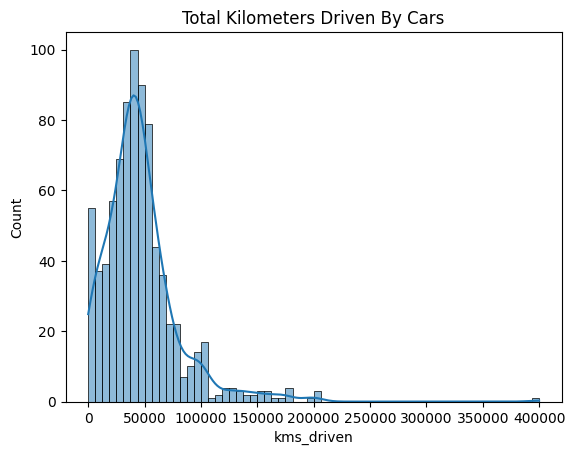

In [32]:
sns.histplot(df['kms_driven'], kde=True)
plt.title("Total Kilometers Driven By Cars")
plt.show()

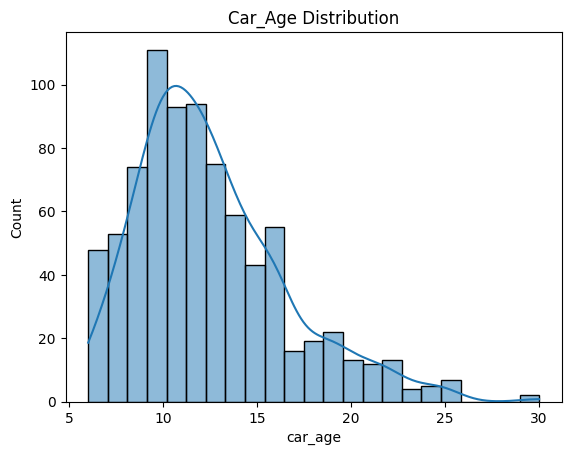

In [33]:
sns.histplot(df['car_age'], kde=True)
plt.title("Car_Age Distribution")
plt.show()

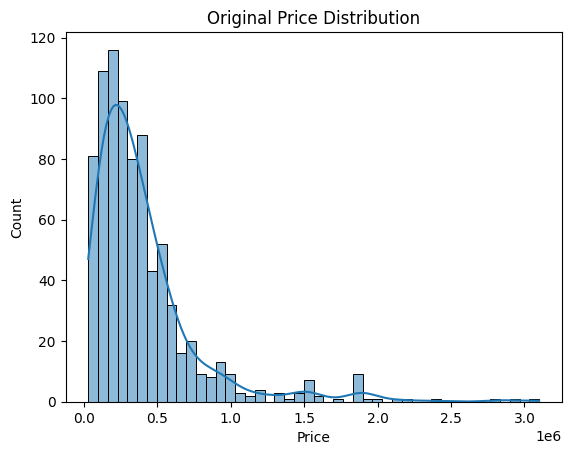

In [34]:
sns.histplot(df['Price'], kde=True)
plt.title("Original Price Distribution")
plt.show()

We can see that price and total kilometer driven by cars distribution are right skewed.

In [35]:
df.to_csv("clean_car_dataset.csv")

#MODEL BUILDING

In [139]:
X=df.drop(columns='Price')
y=df['Price']

In [140]:
X.head()

,name,company,kms_driven,fuel_type,car_age
0,Hyundai Santro Xing,Hyundai,45000.0,Petrol,18
1,Mahindra Jeep CL550,Mahindra,40.0,Diesel,19
2,Hyundai Grand i10,Hyundai,28000.0,Petrol,11
3,Ford EcoSport Titanium,Ford,36000.0,Diesel,11
4,Ford Figo,Ford,41000.0,Diesel,13


In [141]:
y_log=np.log1p(y)

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder,StandardScaler,FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score

In [264]:
X_train,X_test,y_train_log,y_test_log=train_test_split(X,y_log,test_size=0.27,random_state=42)

In [265]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [266]:
column_trans=ColumnTransformer(transformers=[
    ('log',  FunctionTransformer(np.log1p, validate=False),['kms_driven'] ),
    ('ohe',OneHotEncoder(categories=ohe.categories_,handle_unknown='ignore'),['name','company','fuel_type']),
    ('scalar',StandardScaler(),['car_age','kms_driven'])
],
    remainder='passthrough')

In [267]:
from sklearn.model_selection import cross_val_score,RepeatedKFold
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import GridSearchCV

In [268]:
rid=Ridge()

In [269]:
pipe=make_pipeline(column_trans,rid)

In [270]:
pipe.fit(X_train,y_train_log)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['kms_driven']),
                                                 ('ohe',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDri...
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('scalar', StandardScaler(),
                                                  ['car_age', 'kms_driven'])])),
                ('ridge', Ridge())])

In [271]:
y_pred_log=pipe.predict(X_test)
y_pred_original=np.expm1(y_pred_log)
y_orignal_test=np.expm1(y_test_log)

In [272]:
r2_score(y_orignal_test,y_pred_original)

0.7419223551029281

Now applying Cross Validations to Evaluate Model Performance More Reliably and to Avoid Overfitting and Underfitting

In [273]:
best_params={
    'ridge__alpha' : [0.001,0.01,0.1,1,5]
}

In [274]:
best_params_lasso={
    'lasso__alpha' : [0.001,0.01,0.1,1,5]
}

In [275]:
kf=RepeatedKFold(n_splits = 10, n_repeats= 100 , random_state=42)

In [276]:
grid=GridSearchCV(pipe,param_grid=best_params,cv=kf,scoring='r2',n_jobs=-1)

In [277]:
grid.fit(X_train,y_train_log)

GridSearchCV(cv=RepeatedKFold(n_repeats=100, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['kms_driven']),
                                                                        ('ohe',
                                                                         OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3...
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                                                   array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                                       handle_unknown='ignore'),
                                                                         ['name',
                                                                          'company',
                                                                          'fuel_type']),
                                                                        ('scalar',
                                                                         StandardScaler(),
                                                                         ['car_age',
                                                                          'kms_driven'])])),
                                       ('ridge', Ridge())]),
             n_jobs=-1, param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 5]},
             scoring='r2')

In [279]:
best_model = grid.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred_original = np.expm1(y_pred_log)

In [280]:
print("Alpha Value : ",grid.best_params_)
print("R^2 : ",r2_score(y_orignal_test,y_pred_original))

Alpha Value :  {'ridge__alpha': 0.1}
R^2 :  0.7917345218198378


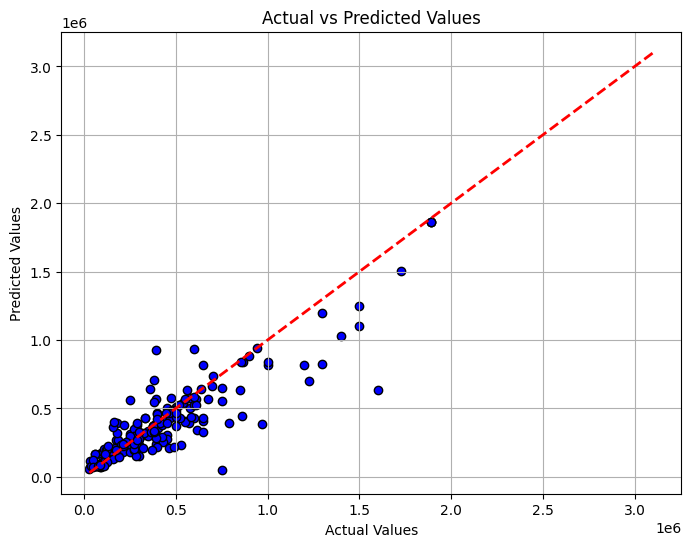

In [281]:
plt.figure(figsize=(8, 6))
plt.scatter(y_orignal_test, y_pred_original, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()


#Conclusion
The best alpha value is 0.1 and R^2 score is 0.79 which is fairly good as the dataset is comparitively small than others.

##NOW TRYING WITH LASSO REGRESSION

In [282]:
lasso=Lasso()

In [283]:
pipe1=make_pipeline(column_trans,lasso)

In [284]:
pipe1.fit(X_train,y_train_log)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['kms_driven']),
                                                 ('ohe',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDri...
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type']),
                                                 ('scalar', StandardScaler(),
                                                  ['car_age', 'kms_driven'])])),
                ('lasso', Lasso())])

In [285]:
y_pred_log_lasso=pipe1.predict(X_test)
y_pred_original_lasso=np.expm1(y_pred_log_lasso)
y_test_original_lasso=np.expm1(y_test_log)

In [286]:
print("R^2 : ",r2_score(y_test_original_lasso,y_pred_original_lasso))
print("Default alpha used by lasso regression : ",lasso.alpha)

R^2 :  -0.12757195596947857
Default alpha used by lasso regression :  1.0


In [287]:
grid1=GridSearchCV(pipe1,param_grid=best_params_lasso,cv=kf,scoring='r2',n_jobs=-1)

In [288]:
grid1.fit(X_train,y_train_log)

GridSearchCV(cv=RepeatedKFold(n_repeats=100, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('log',
                                                                         FunctionTransformer(func=<ufunc 'log1p'>),
                                                                         ['kms_driven']),
                                                                        ('ohe',
                                                                         OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3...
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                                                   array(['Diesel', 'LPG', 'Petrol'], dtype=object)],
                                                                                       handle_unknown='ignore'),
                                                                         ['name',
                                                                          'company',
                                                                          'fuel_type']),
                                                                        ('scalar',
                                                                         StandardScaler(),
                                                                         ['car_age',
                                                                          'kms_driven'])])),
                                       ('lasso', Lasso())]),
             n_jobs=-1, param_grid={'lasso__alpha': [0.001, 0.01, 0.1, 1, 5]},
             scoring='r2')

In [289]:
best_model = grid.best_estimator_
y_log_predict_lasso=best_model.predict(X_test)
y_predict_original_lasso=np.expm1(y_log_predict_lasso)

In [290]:
print("R^2 Score : ",r2_score(y_test_original_lasso,y_predict_original_lasso))
print("Best Alpha value after cross validation : ",grid1.best_params_['lasso__alpha'])

R^2 Score :  0.7917345218198378
Best Alpha value after cross validation :  0.001


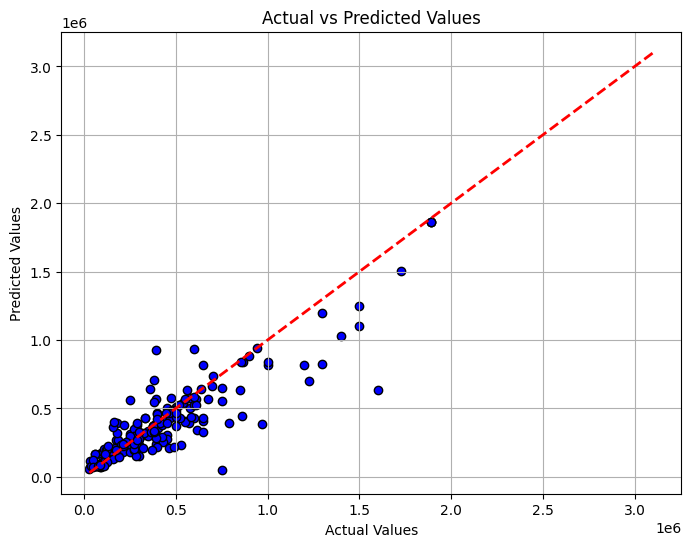

In [291]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original_lasso, y_predict_original_lasso, color='blue', edgecolors='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

#Conclusion
Lasso regression gives similar results to that of ridge regression and aplha value of 0.001 suggests that there is no need for regularization for my model.